In [1]:
from qiskit.visualization import plot_bloch_multivector
from qiskit.circuit.library import QFT
from qiskit.quantum_info import Statevector
from qiskit import Aer, QuantumCircuit, execute
import numpy as np

def print_states(num_qbits: int, qft_circuit: QuantumCircuit):
    states = [format(x, f'0{num_qbits}b') for x in range(2 ** num_qbits)]
    for state in states:
        print('================================')
        print('State = ' + state)
        circuit = QuantumCircuit(num_qbits)
        circuit.initialize(Statevector.from_label(state).data, range(num_qbits))
        circuit.append(qft_circuit, range(num_qbits))
        display(plot_bloch_multivector(Statevector.from_instruction(circuit).data))

In [2]:
num_qbits = 3

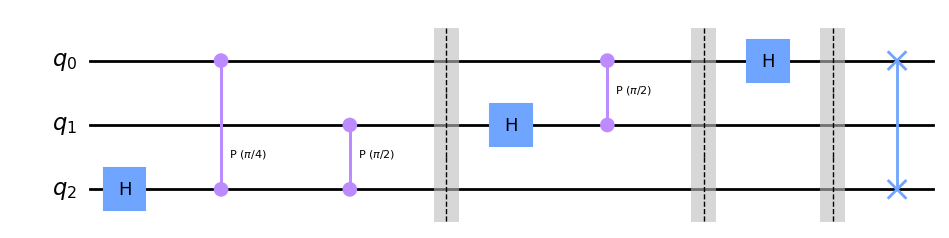

In [3]:
qc = QuantumCircuit(num_qbits)
for i in range(num_qbits - 1, -1, -1):
    qc.h(i)
    for j in range(i):
        qc.cp(np.pi/(2**(i-j)), j, i)
    qc.barrier()
for qubit in range((num_qbits//2)):
    qc.swap(qubit, num_qbits-qubit-1)
qc.draw('mpl')

State = 000


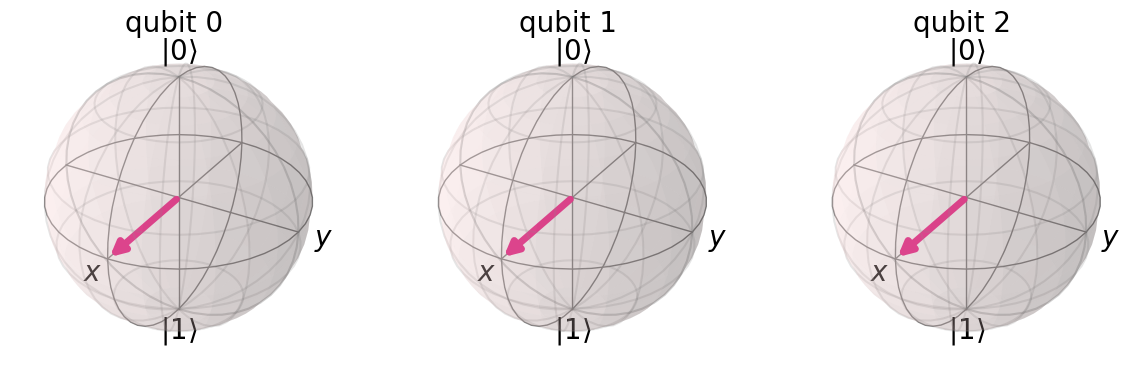

State = 001


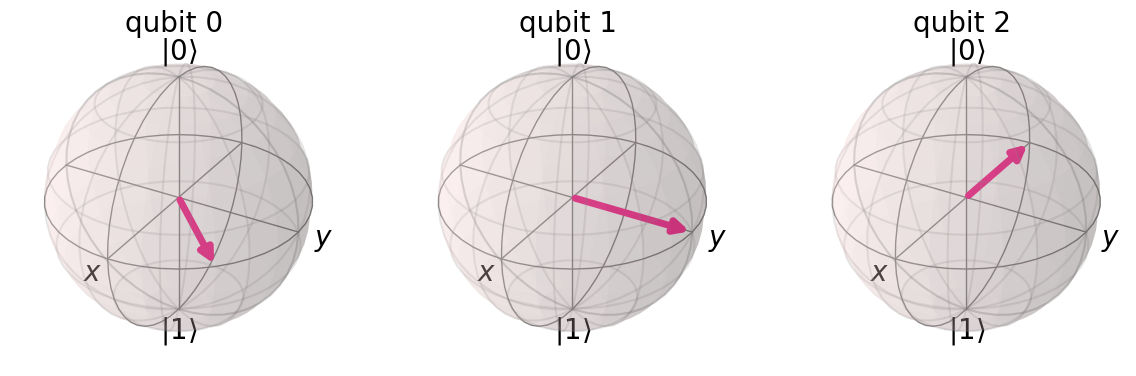

State = 010


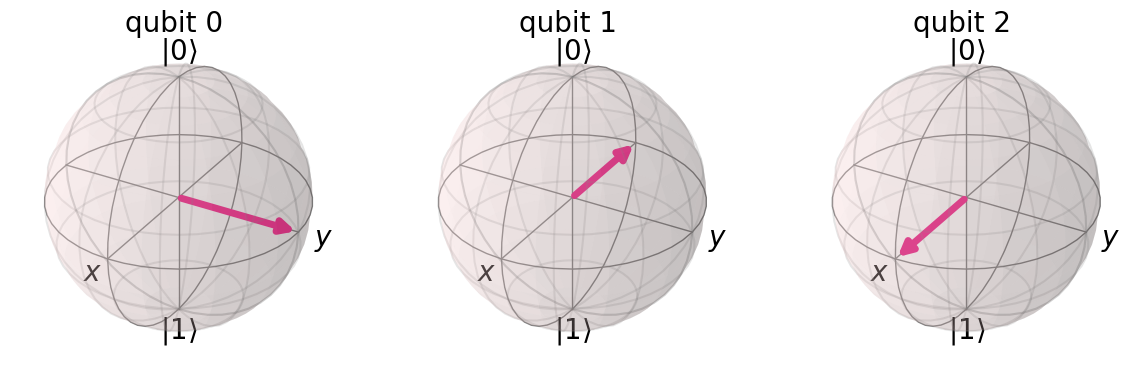

State = 011


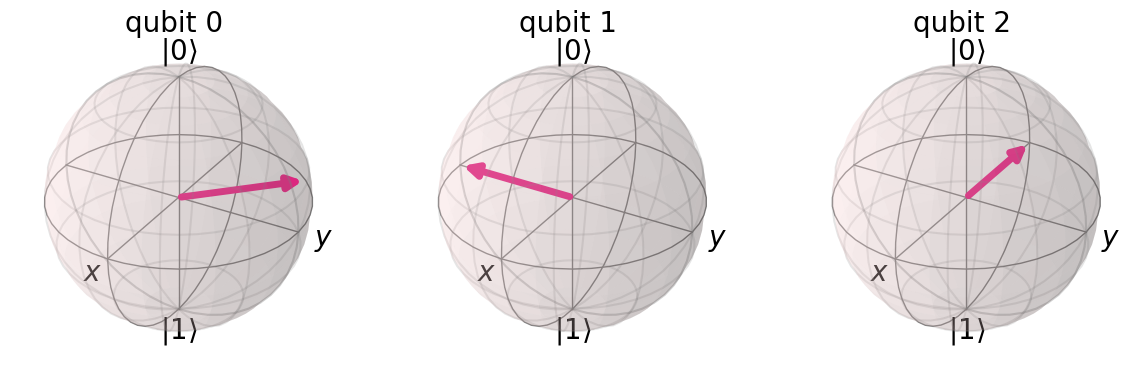

State = 100


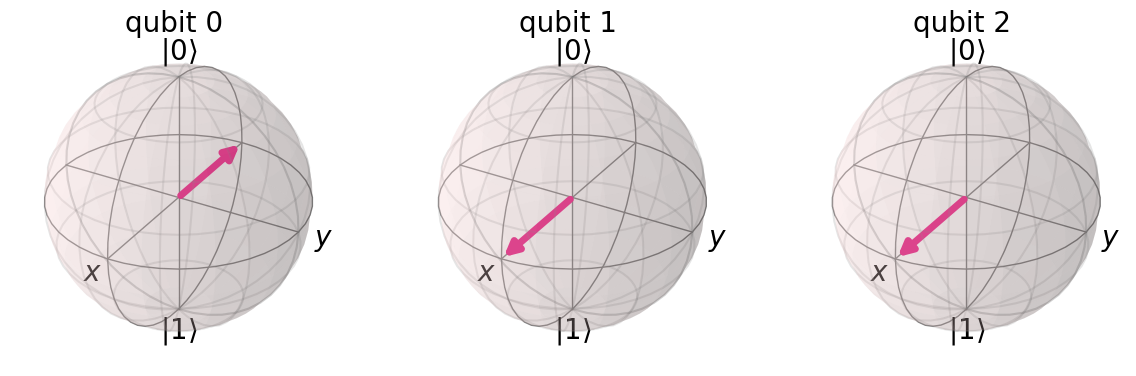

State = 101


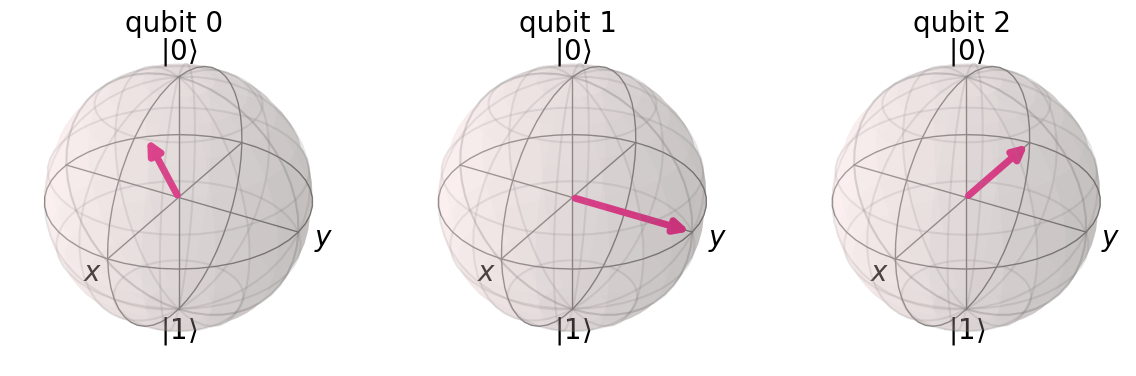

State = 110


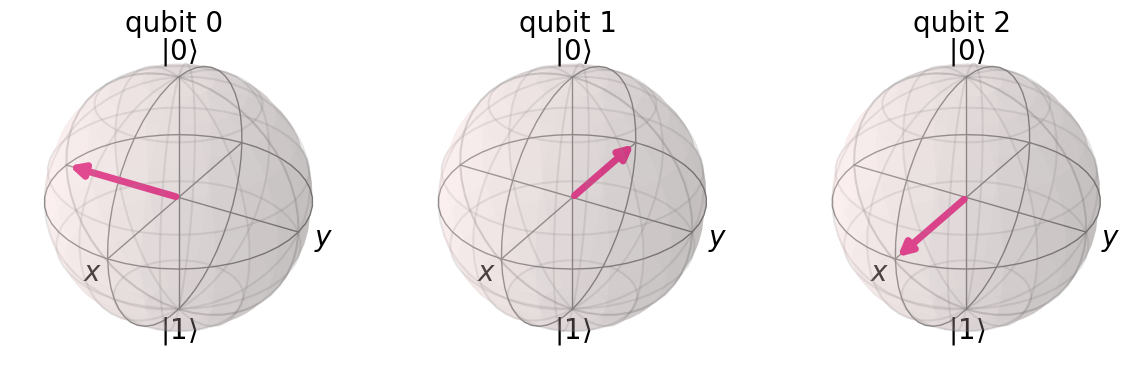

State = 111


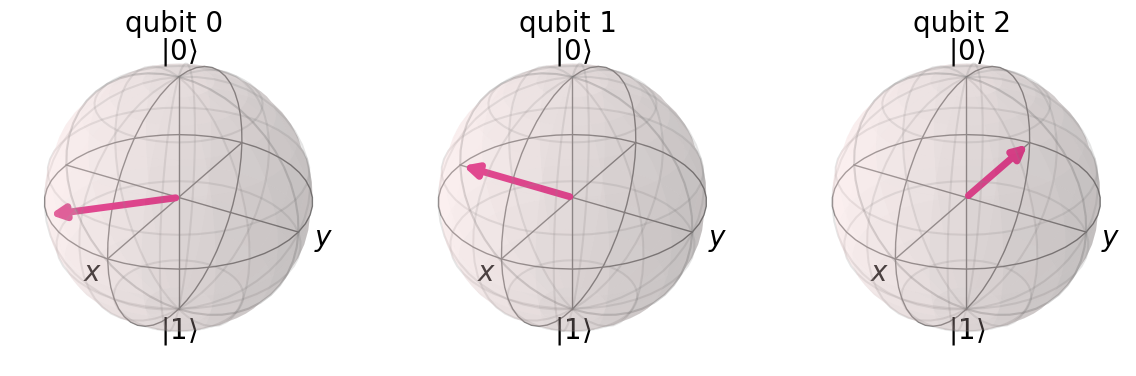

In [4]:
print_states(num_qbits, qc)

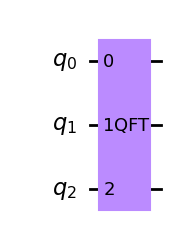

In [5]:
qc = QFT(num_qbits)
qc.draw('mpl')

State = 000


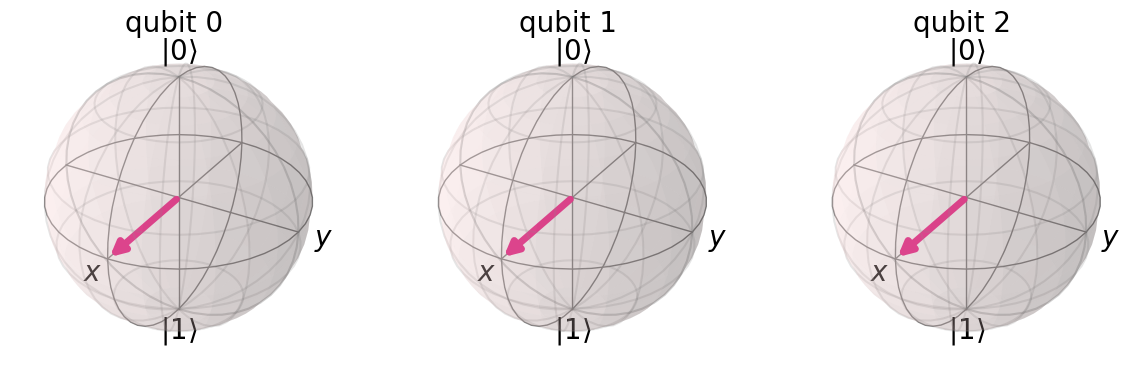

State = 001


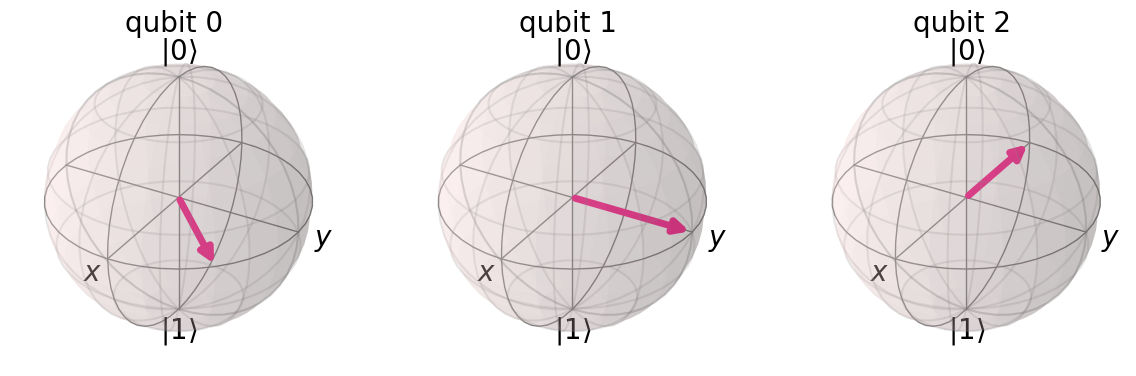

State = 010


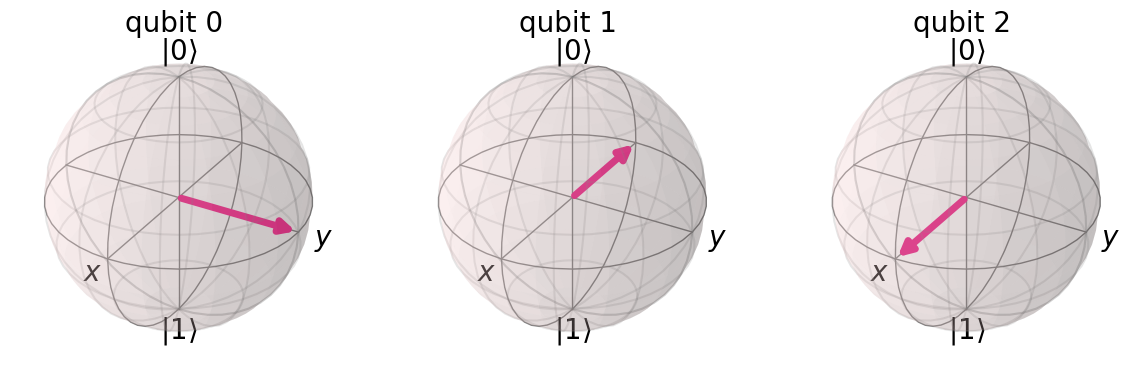

State = 011


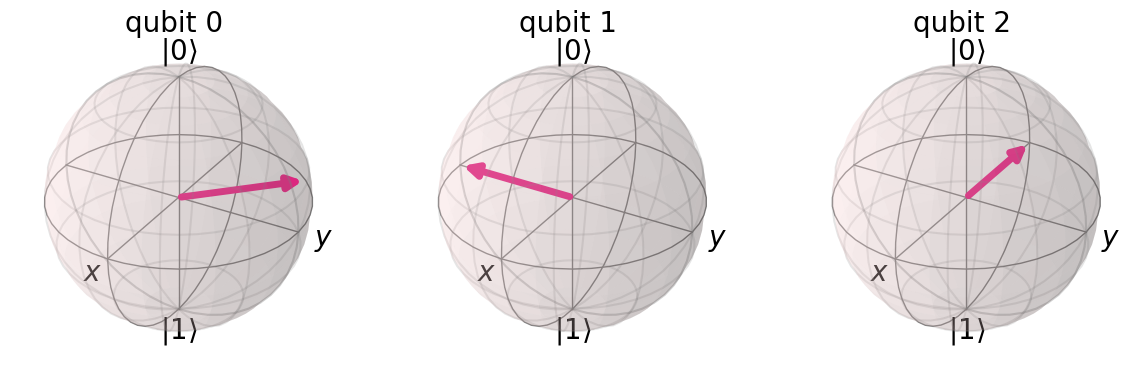

State = 100


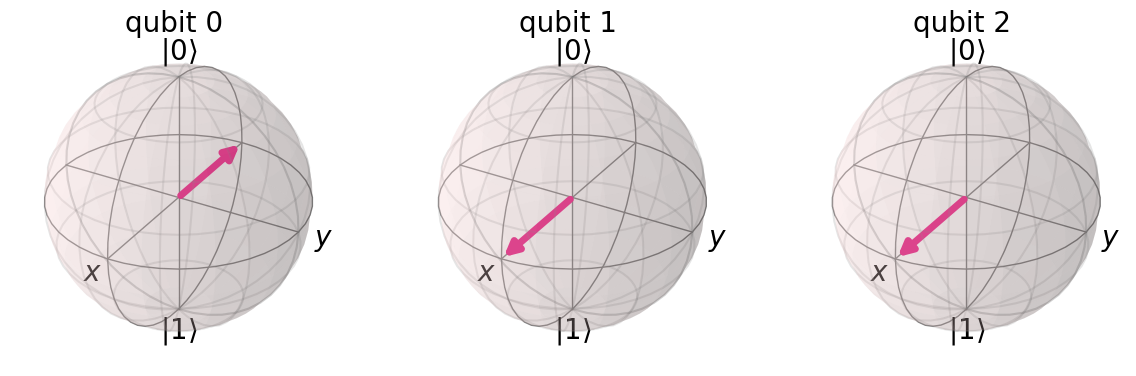

State = 101


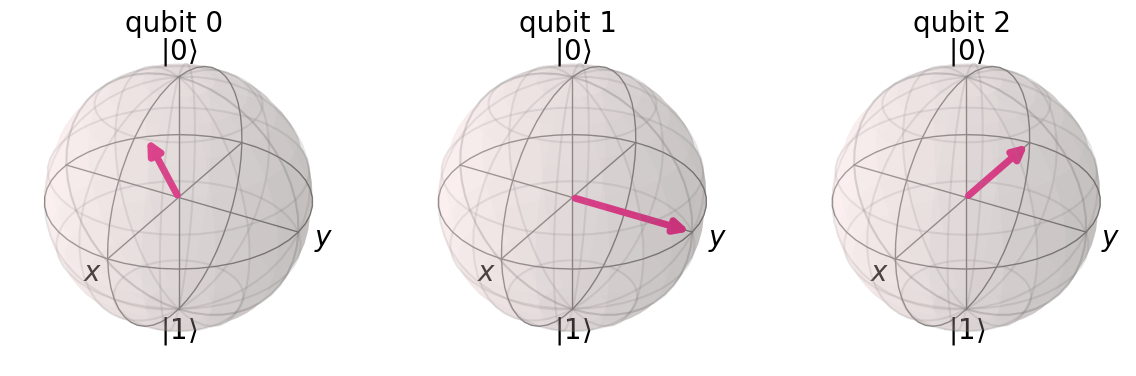

State = 110


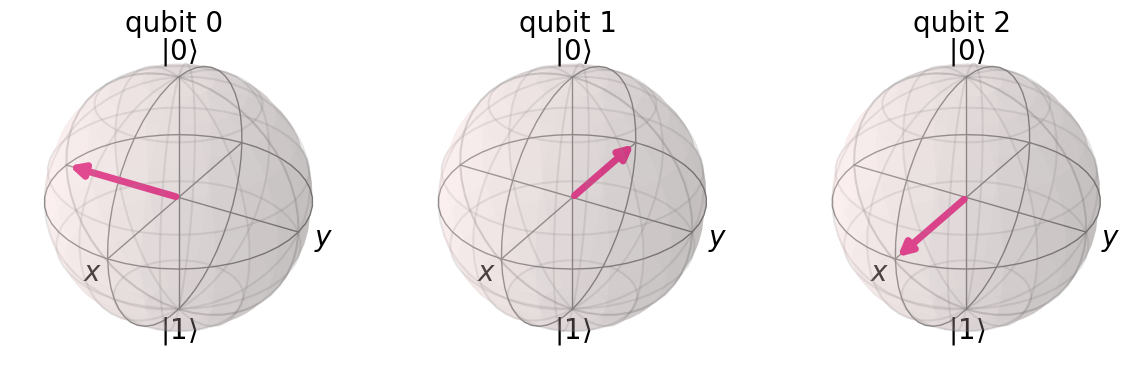

State = 111


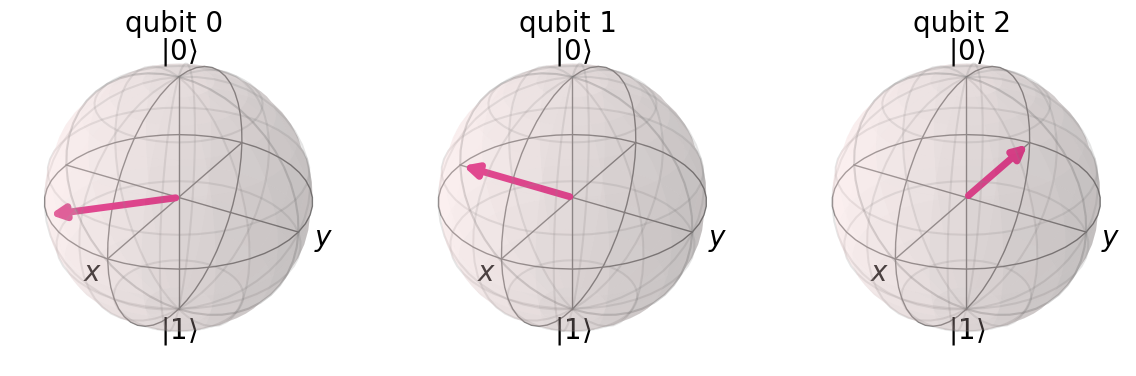

In [6]:
print_states(num_qbits, qc)